<a href="https://colab.research.google.com/github/007tickooayush/ML-Classification-Cardiovascular-Risk-Prediction-Project/blob/master/Ayush_Tickoo_ML_Capstone_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Contributor**     - Ayush Tickoo

# **Project Summary -**

In this project we have 15 features available to work on (age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD). Firstly we will be exploring the dataset and draw out the findings related to the dataset available. The initial step will be checking the null, empty and missing values in the dataset and treating them before the exploratory data analysis is started, mainly known as data preprocessing. After the dataset is ready we will explore the dataset and draw out heuristics along with univariate, bivariate and multivariate analysis and visualizations. And from the findings gathered after the EDA we will start with feature engineering and perform manipulations on the dataset to make it ready for model implementation. Before model implementation the data will be scaled and split into train and test set with some appropriate ratio. After that the Classifier models will be trained using the dataset.
To get the best possible fit hyper-parameter tuning will be applied as well, and based on the evaluation metrics will be validated which of the models implemented is the best to apply in the provided use case of Cardiovascular risk prediction.


# **GitHub Link -**

[Project Github Link](https://github.com/007tickooayush/ML-Classification-Cardiovascular-Risk-Prediction-Project)

# **Problem Statement**


**The dataset is from a cardiovascular study on residents of the tower of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD). The dataset provides the patients’ information. It includes approximately 4000 records and 15 attributes. Each attribute is a potential risk factor. There are demographic, behavioral and medical risk factors available in the dataset.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
from numpy import math
import numpy as np
from numpy import nan
import pandas as pd
import missingno as msno

from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# to reduce the deprecated method and other unnecessary warning messages from the console
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = False)

Mounted at /content/drive


Import the CSV File

In [ ]:
# Load Dataset
dir_path = '/content/drive/MyDrive/Colab Notebooks/ALMABETTER_DSC/1_1.3_Classification_Project/Ayush Tickoo ML Classification Project [Capstone Project]/data/'
df = pd.read_csv(dir_path+'data_cardiovascular_risk.csv')

In [ ]:
# create a backup of the datafame
df_bkup = df.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Target Variables value counts
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
# Percentage composition of Classes
df['TenYearCHD'].value_counts() / len(df) * 100

0    84.926254
1    15.073746
Name: TenYearCHD, dtype: float64

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Duplicate Values in the Dataset =',df.duplicated().sum())

Duplicate Values in the Dataset = 0


#### Missing Values/Null Values

In [ ]:
# Missing/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Percentage of missing/null values
df.isnull().sum()/len(df) * 100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

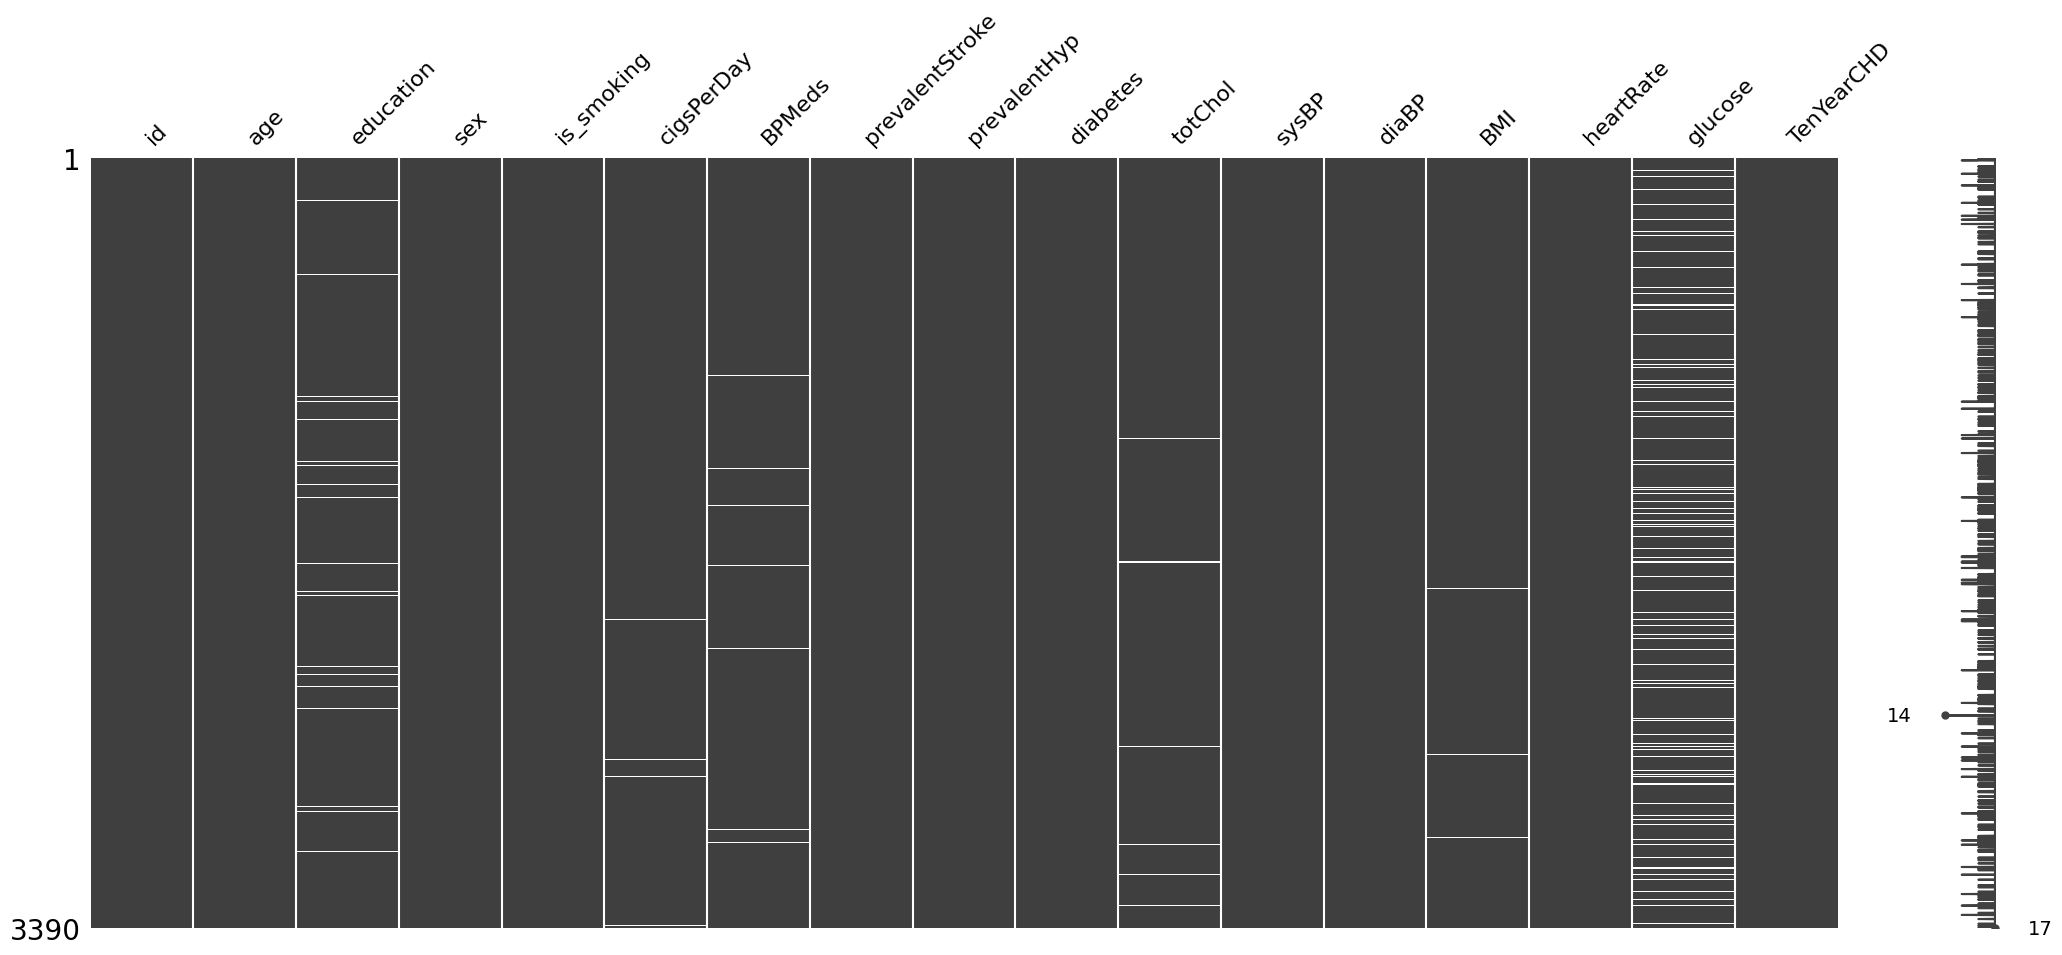

In [ ]:
# Visualizing the missing values
msno.matrix(df)
plt.show()

### What did you know about your dataset?

In the provided dataset there is less percentage of missing values throughout the dataset, and the values are missing in a very distributed manner rather than in a grouped manner for the rows as it is shown in the visual representation of the same. 

The variable glucose has the highest number of missing/null values. 

There are some variables such as `sex` and `is_smoking` that can be encoded to get numerical(binary) representation of the variables which can be more useful for the process.

Also we have a major imbalance between the classes in of dataset provided.

The continuous numerical variables found are `diabetes`, `totChol`, `cigsPerDay` , `BMI`, `diaBP`, `sysBP` and `glucose`.

We can continue with the data preprocessing and visualization to gain more insights about the relation of variables and know more about the data.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns_str = [i for i in df.columns.values]

print('The columns available are:')
print(str(columns_str).replace("'",""))

The columns available are:
[id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]


In [ ]:
# Dataset Describe

### Variables Description 

The description of the variables in dataset are:
- `id`: The unique ID allocated for each observation (int:continuous) 
- `age`: Age of the person (int:continuous)
- `education`: Rating for a person's education (float:ordinal)
- `sex`: Gender of the person (string:categorical)
- `is_smoking`: Does the person smoke (string:categorical)
- `cigsPerDay`: Number of cigrettes smoked by the person per day (string:continuous)
- `BPMeds`: Whether the person is taking Blood Pressure medicines (int:categorical)
- `prevalentStroke`: Does the person have a history of strokes (int:categorical)
- `prevalentHyp`: Does the person have a ihstory of hypertension (int:categoical) 
- `diabetes`: Does the person have diabetes (int:categorical)
- `totChol`: Cholestrol measure of the person (int:continuous)
- `sysBP`: Systolic BP measure of the person(int:continuous)
- `diaBP`: Diastolic BP measure of the person(int:continuous)
- `BMI`: Body Mass Index of the person(int:continuous)
- `heartRate`: Heart rate of the person (int:continuous)
- `glucose`: Glucose levels of the person (int:continuous)

*Target Variable:*
- `TenYearCHD`: Ten years risk coronary heart disease in a person (int:categorical)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [ ]:
# Getting the actual unique values of each variable
def get_unique(df):
  var_unique = {}
  for col in df.select_dtypes(include = ['float64','int64']).columns:
    # geting the unique values of each column(variable)
    unique_values = df[col].unique().tolist()
    # storing the variable vs the unique values as a map
    var_unique[col] = unique_values
    unique_values = []
  
  return var_unique

In [ ]:
var_unique = get_unique(df)

# validate all the unique values
for var, values in var_unique.items():
    # For readability just limiting the output to 20 points max 
    if len(values) > 20:
      values = values[0:20] 
      values.append('...')
    print('The unique values for column `',var,'` are => ',values)

The unique values for column ` id ` are =>  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, '...']
The unique values for column ` age ` are =>  [64.0, 36.0, 46.0, 50.0, 61.0, 41.0, 55.0, 53.0, 43.0, 44.0, 58.0, 51.0, 56.0, 42.0, 38.0, 63.0, 35.0, 54.0, 62.0, 47.0, '...']
The unique values for column ` education ` are =>  [2.0, 4.0, 1.0, 3.0, 2.5, 1.5, 3.5]
The unique values for column ` cigsPerDay ` are =>  [3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0, 9.0, 60.0, 17.0, 25.0, 5.0, 43.0, 7.0, 50.0, 19.0, 18.0, 1.0, 45.0, '...']
The unique values for column ` BPMeds ` are =>  [0.0, 1.0, 0.5]
The unique values for column ` prevalentStroke ` are =>  [0.0, 1.0]
The unique values for column ` prevalentHyp ` are =>  [0.0, 1.0]
The unique values for column ` diabetes ` are =>  [0.0, 1.0]
The unique values for column ` totChol ` are =>  [221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238.0, 295.0, 220.0, 326.0, 230.0, 210.0, 213.0, 227.0

## 3. ***Data Wrangling***

### Data preprocessing

In [ ]:
# Encoding the variables
df.describe(include='object').columns

Index(['sex', 'is_smoking'], dtype='object')

In [ ]:
df['is_male'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
df['is_smoker'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

In [ ]:
# removing all the columns with string values after encoding the categoical variables 
df = df[[i for i in df.describe().columns]]

In [ ]:
# updating the unique values stored
var_unique = get_unique(df)

In [ ]:
# Imputing the null values using KNNImputer
knn_imputer = KNNImputer(n_neighbors = 2)
df = pd.DataFrame(knn_imputer.fit_transform(df),columns=df.columns)

In [ ]:
df.isnull().sum()

id                 0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
is_male            0
is_smoker          0
dtype: int64

In [ ]:
# getting the numerical columns
columns_num = df.select_dtypes(include = ['float64','int64']).columns
# deleting the `id` column
columns_num = columns_num.delete([0])
# columns_num = df.describe().columns.tolist()

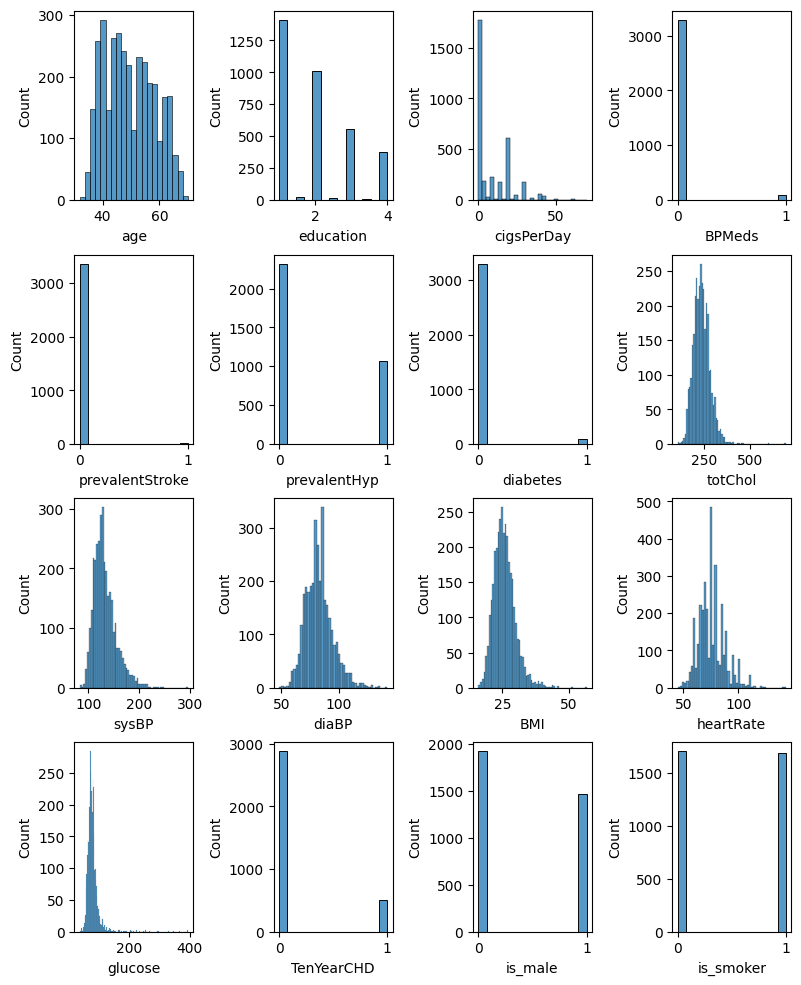

In [ ]:
# univariate analysis

fig = plt.figure(figsize = (8,24))
idx = 1
for var in columns_num:
  # plt.subplots(figsize = (6,6))
  plt.subplot(10,4,idx)
  sns.histplot(df[var])
  # plt.title(var)
  idx += 1
# ax.set_title('Histplots: numerical variables')
# ax.set_xlabel('Value')
# ax.set_ylabel('Frequency')

plt.tight_layout(pad = 0.5, h_pad = 0.5, w_pad = 0.5)

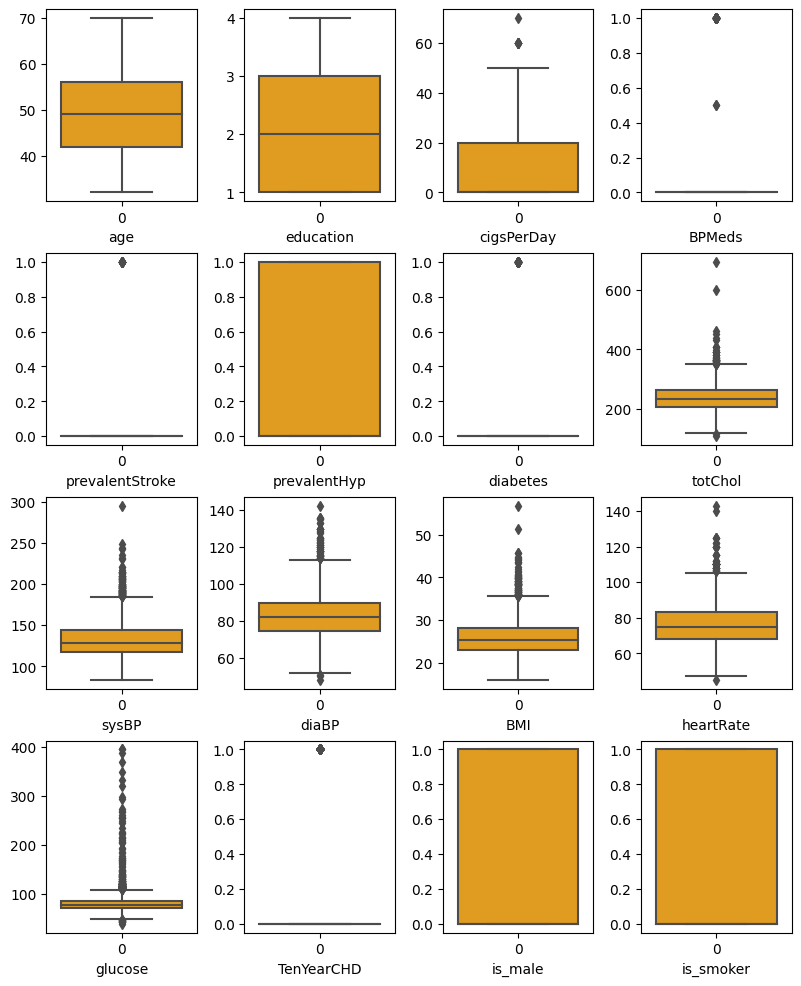

In [ ]:
# Checking for outliers (outside 75% + 1.5 IQR)

fig = plt.figure(figsize = (8,24))
idx = 1

for var in columns_num:
  # plt.subplots(figsize = (6,6))
  plt.subplot(10,4,idx)
  sns.boxplot(df[var],color='orange')
  plt.xlabel(var)
  idx += 1

plt.tight_layout(pad = 0.5, h_pad = 0.5, w_pad = 0.5)

The data points classified as outliers either belong to the imbalanced class with lesser occurance or are most likely the imputed data points, for most of the varibles. 

### What all manipulations have you done and insights you found?

We have imputed all the NaN/missing values in the dataset, though there were not more than 10 percent of such values for any of the variable. And most of the NaN values were found to be only in numerical variables itself. We have not performed the scaling or normalization of the data yet, but we will be performing that as well. 

There is major class imbalance found to be in the target variable, and additionaly scarcity is also found in some other variables as well, like `BPMeds`, `prevalantStroke`, and `diabetes`, which need to be handled as well.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

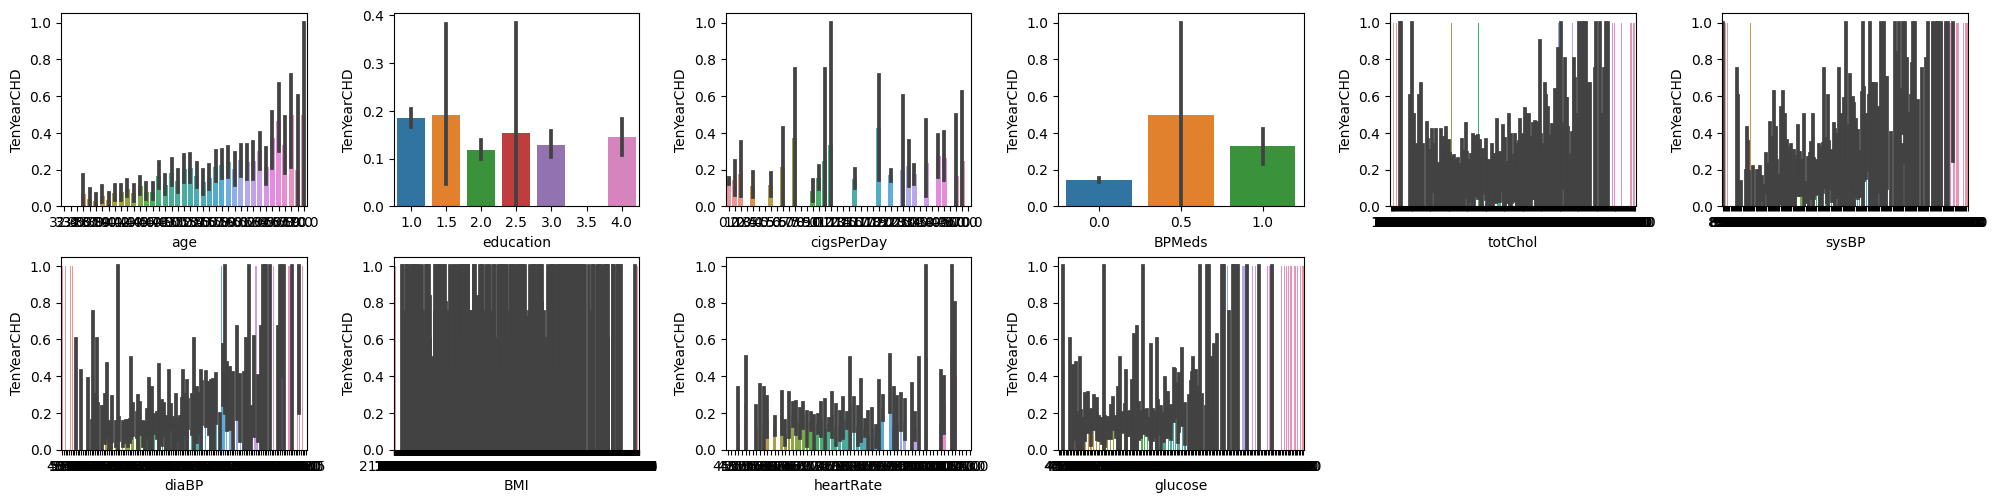

In [59]:
# Chart - 1 visualization code
# df.plot.scatter(x='age',y='totChol')
fig = plt.figure(figsize = (20,24))
idx = 1
for var, values in list(var_unique.items())[1:]:
  if len(values) > 2:
    # print(var,' : ',values)
    plt.subplot(10,6,idx)
    sns.barplot(data = df, y='TenYearCHD',x=var)
    idx += 1

plt.tight_layout(pad = 0.5, h_pad=0.5, w_pad = 0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

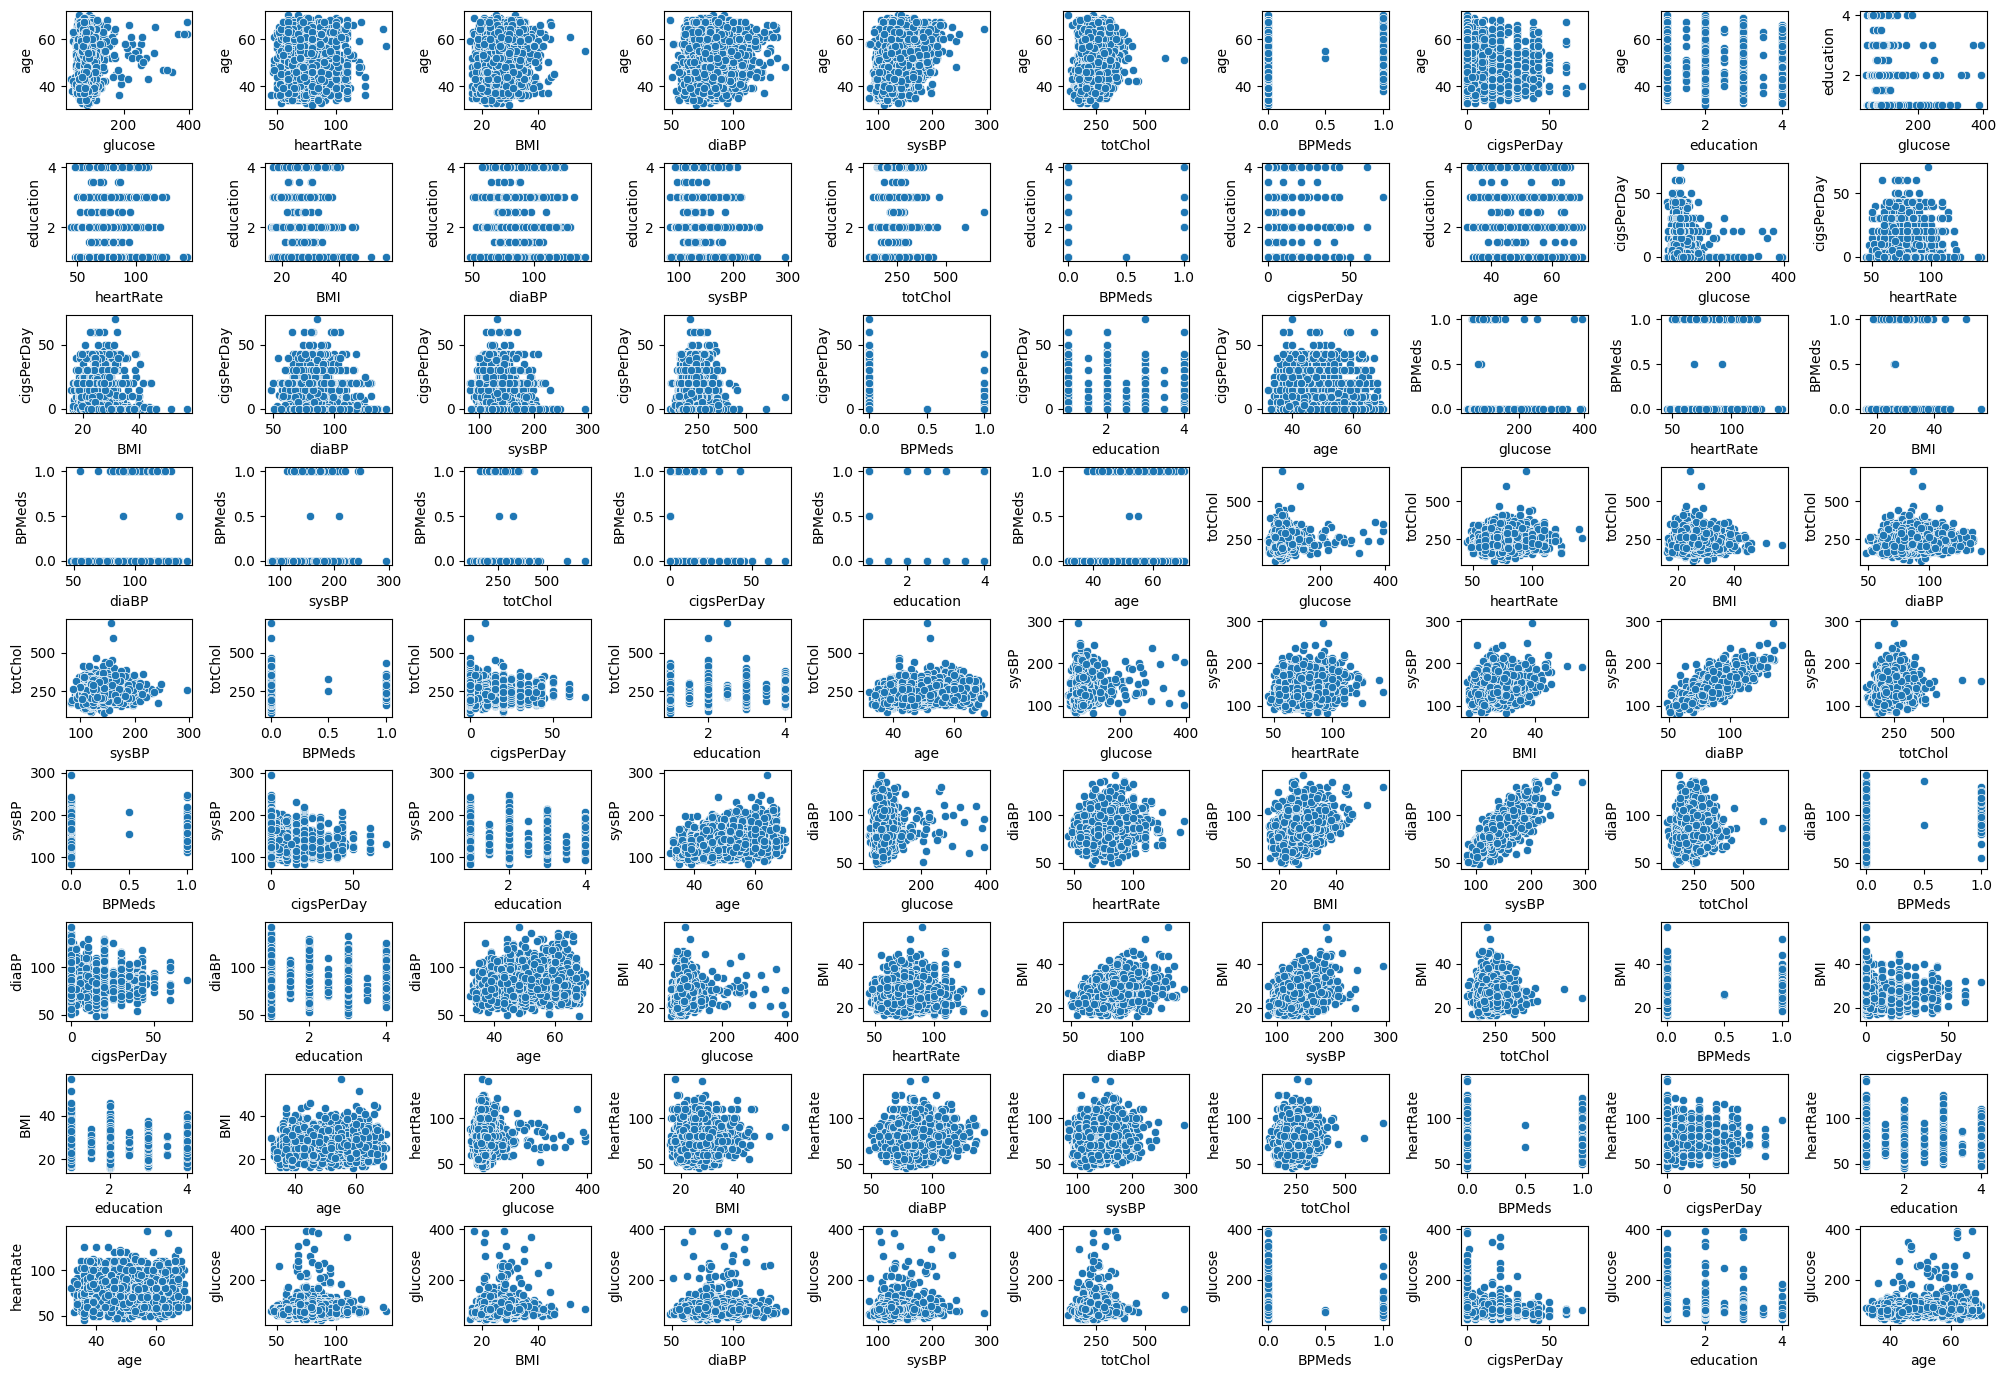

In [86]:
# Chart - 2 visualization code
# df.plot.scatter(x='age',y='cigsPerDay')
fig = plt.figure(figsize = (20,30))
idx = int(1)

var_unique_list = list(var_unique.items())[1:]

# print(var1,' : ',var2)

for var1, values1 in var_unique_list:
  for var2, values2 in var_unique_list[::-1]:
    if (len(values1) > 2 and len(values2) > 2) and var1 != var2 and (var1 != 'TenYearCHD' and var2 != 'TenYearCHD') :
      plt.subplot(20,10,idx)
      sns.scatterplot(data = df, y=var1, x=var2)
      idx += 1
      # plt.figure(figsize = (10,12))
      # plt.show()

plt.tight_layout(pad = 0.5, h_pad=0.5, w_pad = 0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

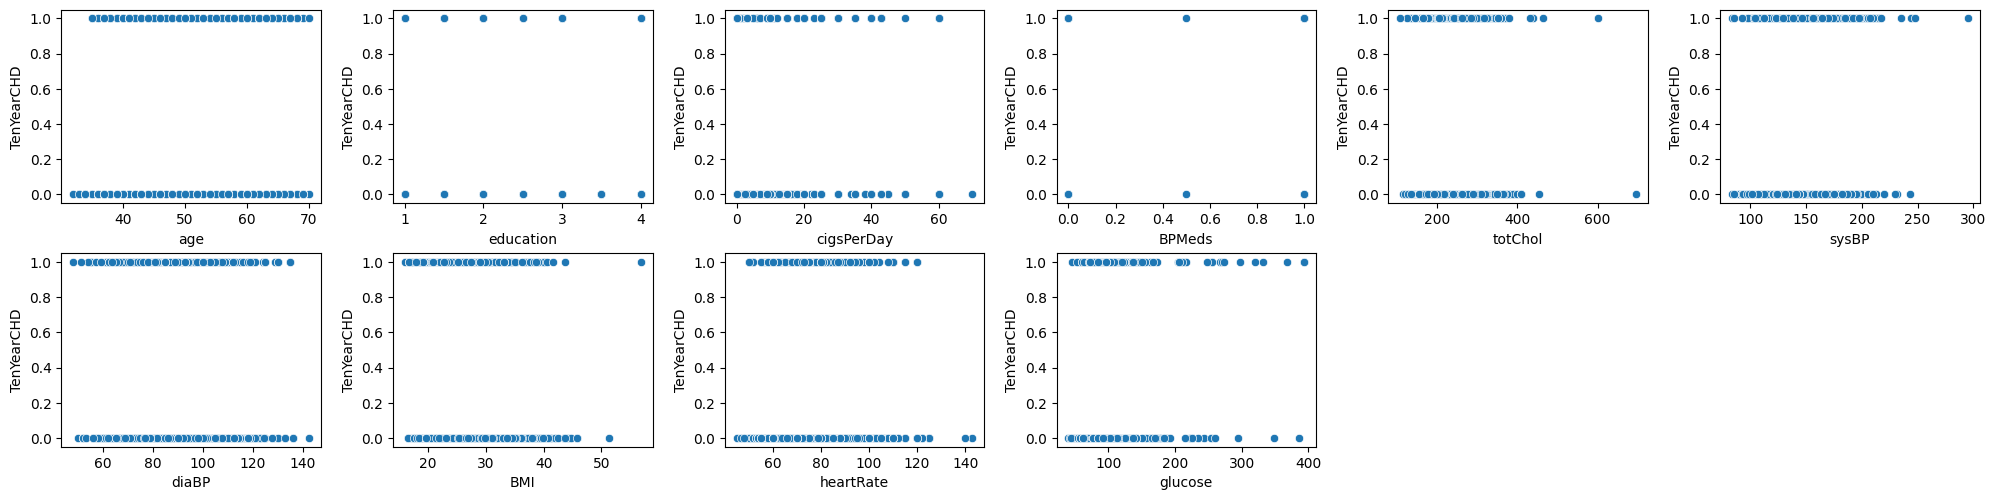

In [84]:
# Chart - 3 visualization code
# df.plot.scatter(x='cigsPerDay',y='totChol')
fig = plt.figure(figsize = (20,24))
idx = 1
for var, values in list(var_unique.items())[1:]:
  if len(values) > 2:
    # print(var,' : ',values)
    plt.subplot(10,6,idx)
    sns.scatterplot(data = df, y='TenYearCHD',x=var)
    idx += 1

plt.tight_layout(pad = 0.5, h_pad=0.5, w_pad = 0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'is_male', 'is_smoker'],
      dtype='object')

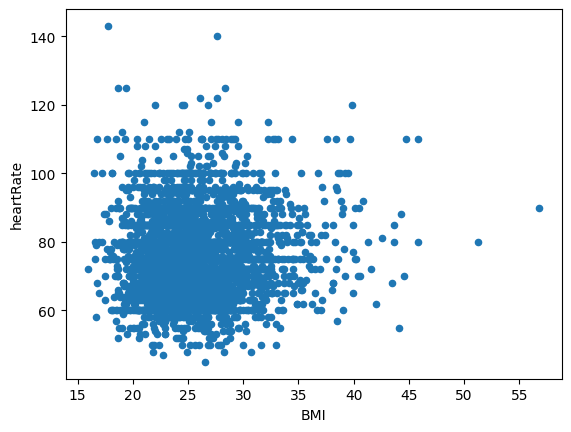

In [ ]:
# Chart - 4 visualization code
df.plot.scatter(x='BMI',y='heartRate')

ins: if BMI normal then heartRate is normal 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='heartRate', ylabel='glucose'>

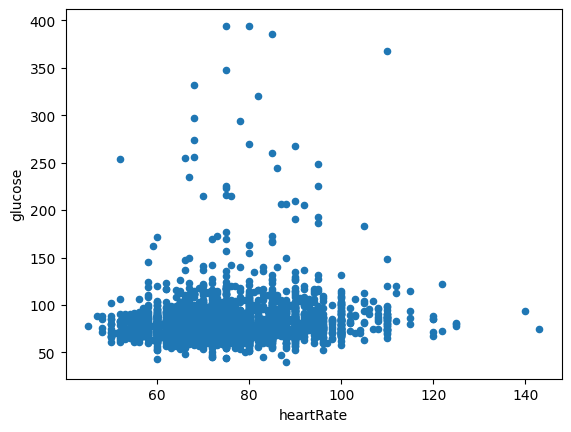

In [ ]:
# Chart - 5 visualization code
df.plot.scatter(x='heartRate',y='glucose')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='education', ylabel='cigsPerDay'>

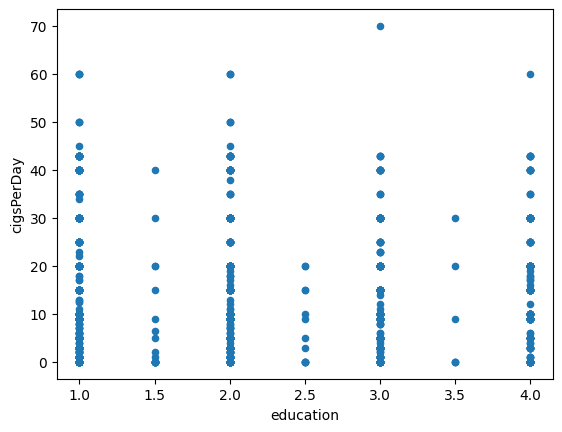

In [ ]:
# Chart - 6 visualization code
df.plot.scatter(x='education',y='cigsPerDay')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***